<a href="https://colab.research.google.com/github/joonathaanm/Cells3D/blob/main/CELLS3DFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pwd

/content


In [ ]:
cd sample_data/

/content/sample_data


In [ ]:
!ls

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [ ]:
!git clone https://github.com/susymx/Cells3D.git

Cloning into 'Cells3D'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 56 (delta 26), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (56/56), done.


In [ ]:
!python --version

Python 3.7.13


In [ ]:
import sys
sys.path.append('/content/sample_data/Cells3D')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

"""FUNCTIONS"""
import paths 
import connectedComponents as co; 
import plots
import connectionMatrix 
import cluster 
import nullModel 



#fileLocation='P3D.csv'  #proof file
#cells = readCSV.extractCells3D(fileLocation, 'all', False)

nullrMin = 1250     # Arbitrary size of one side #Radio menor
nullrMax = int(nullModel.rMax(14.0756, nullrMin)) 
nsli=1 #number of slices
sliDistance=50 
""" nullModel.generateCell3DB:False: radius is 125, True: 100-150
                              nullrMin: is the size of x axis =1250
                              nullrMax: is the size of y axis =3584
                              zi: is the initial coord for z =0
                              zf: is the final coord for z    =160
                              sliDistance: distance between slices =50
                              True: if control; False: if AVP    """   
cells= nullModel.generateCell3DB(False,nullrMin,nullrMax, 0, 160, sliDistance,False) #Proof with equations from extrapolation

criteria=2
 
criterion=0.8
#Toda probabilidad  mayor a 0.8 se hace la conexcion
#slices='1 y 2' """
section='all'
saveFigs=False;

#matrix = co.distanceMatrix3D(cells)    #cells must have cells from diferent slices 

matrixP = connectionMatrix.probabilityMatrix3D(cells, criteria, 125)
nCells=len(cells)
matrixbin, adList = connectionMatrix.binaryMatrix3D(matrixP, criterion)
components, nodes= co.connectedComponents( matrixbin)
edgesPN = co.edgesPerNode(matrixbin)
centrality  =paths.brandeAlgorithm(adList)
localClustering = cluster.localClusteringCoef(range(0, nCells), adList, matrixbin)
nodesPCC_WOZ  = co.nodesPerCC_WOZ(components)

ccClustering = np.empty(len(components)-1)
for i in range(0, len(components)-1):
    ccClusteringTemp    = cluster.localClusteringCoef(components[i+1], adList, matrixbin)
    ccClustering[i]     = cluster.globalClusteringCoef(ccClusteringTemp)
ccTransitivity = np.empty(len(components)-1)
for i in range(0, len(components)-1):
    ccTransitivity[i]   = cluster.transitivityCoef(components[i+1], adList,  matrixbin)



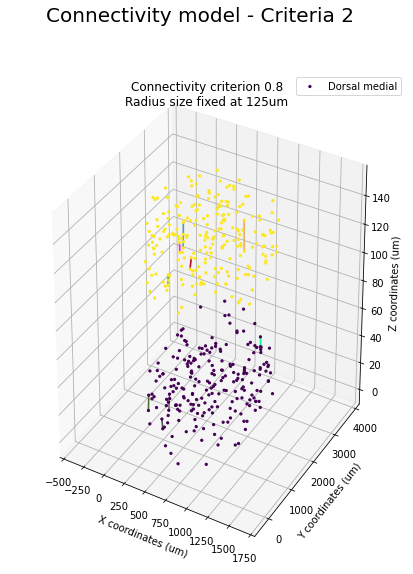

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

plots.drawNodes(cells, ax1, False)
plots.drawConnectedComponents(components, matrixbin, cells, ax1)
plots.drawEdges(matrixbin, cells, ax1)
#plots.markThisCells(components[0], cells, '#0000FF', ax1) #isolated cells


fig.set_size_inches((7.15,9.1))
fig.suptitle('Connectivity model - Criteria ' + str(criteria), fontsize=20)
ax1.set_title(  'Connectivity criterion ' + str(criterion) + '\n' + 'Radius size fixed at 125um', fontsize=12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlabel('X coordinates (um)')
ax1.set_ylabel('Y coordinates (um)')
ax1.set_zlabel('Z coordinates (um)')
ax1.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax1.legend()
ax1.set_xlim(-500, nullrMin+500)
ax1.set_ylim(-500, nullrMax+500)
#figNetworkName = '01'+ '-' + slices + '-' + section + '.png'
plt.show()



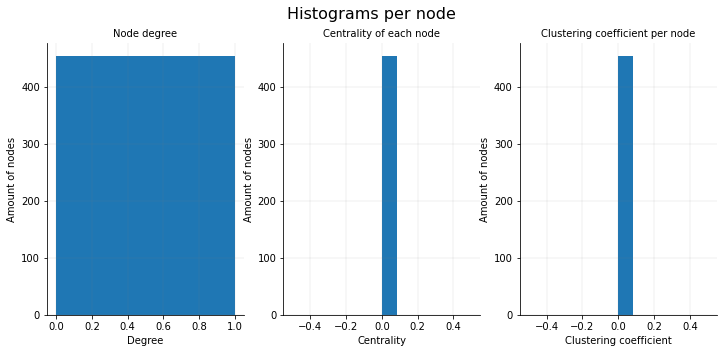

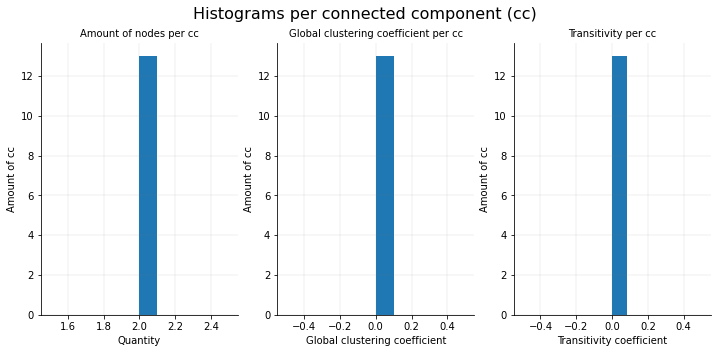

In [ ]:
figNodes, axNodes = plt.subplots(1, 3)  # Figs for the histograms for individual nodes
binsND = int(np.amax(edgesPN))
if binsND <= 0:
    binsND = 10
axNodes[0].hist(edgesPN, bins = binsND)
axNodes[1].hist(centrality, bins=12)
axNodes[2].hist(localClustering, bins=12)

figCC, axCC = plt.subplots(1, 3)        # Figs for individual connected components
axCC[0].hist(nodesPCC_WOZ, bins=10)
axCC[1].hist(ccClustering, bins=10)
axCC[2].hist(ccTransitivity, bins=12)

# Style and info for the network figure

"""Style and info for the histograms of individual nodes  """

figNodes.set_size_inches((12, 5))
figNodes.suptitle('Histograms per node', fontsize=16)
axNodes[0].set_title('Node degree', fontsize=10)
axNodes[0].spines['top'].set_visible(False)
axNodes[0].spines['right'].set_visible(False)
axNodes[0].set_xlabel('Degree')
axNodes[0].set_ylabel('Amount of nodes')
axNodes[0].grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
axNodes[1].set_title('Centrality of each node', fontsize=10)
axNodes[1].spines['top'].set_visible(False)
axNodes[1].spines['right'].set_visible(False)
axNodes[1].set_xlabel('Centrality')
axNodes[1].set_ylabel('Amount of nodes')
axNodes[1].grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
axNodes[2].set_title('Clustering coefficient per node', fontsize=10)
axNodes[2].spines['top'].set_visible(False)
axNodes[2].spines['right'].set_visible(False)
axNodes[2].set_xlabel('Clustering coefficient')
axNodes[2].set_ylabel('Amount of nodes')
axNodes[2].grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
#figNodesName = '01' + '-' + slices + '-' + section + ' - Hist per nodes.png'

    
"""Style and info for the histograms of individual connected components """

figCC.set_size_inches((12, 5))
figCC.suptitle('Histograms per connected component (cc)', fontsize=16)
axCC[0].set_title('Amount of nodes per cc', fontsize=10)
axCC[0].spines['top'].set_visible(False)
axCC[0].spines['right'].set_visible(False)
axCC[0].set_xlabel('Quantity')
axCC[0].set_ylabel('Amount of cc')
axCC[0].grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
axCC[1].set_title('Global clustering coefficient per cc', fontsize=10)
axCC[1].spines['top'].set_visible(False)
axCC[1].spines['right'].set_visible(False)
axCC[1].set_xlabel('Global clustering coefficient')
axCC[1].set_ylabel('Amount of cc')
axCC[1].grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
axCC[2].set_title('Transitivity per cc', fontsize=10)
axCC[2].spines['top'].set_visible(False)
axCC[2].spines['right'].set_visible(False)
axCC[2].set_xlabel('Transitivity coefficient')
axCC[2].set_ylabel('Amount of cc')
axCC[2].grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
#figCCName = '01' + '-' + slices + '-' + section + ' - Hist per cc.png'